In [ ]:
!pip install -q catboost
!pip install -q --upgrade seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', -1)

import warnings
warnings.simplefilter('ignore')

<ipython-input-1-e2429a08ba87>:23: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:

train = pd.read_csv('Data/Train.csv')

In [3]:
train.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [4]:
ID_COL, TARGET_COL = 'id', 'term_deposit_subscribed'
features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]

cat_cols = ['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

num_cols = [c for c in features if c not in cat_cols]

In [5]:
score ={}

### **C. Classification Models.**

for the purpose of creating a baseline classification model, we will make the following:


1. Logistic Regression.
2. Decision Tree

In [6]:
train.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [7]:
train.shape

(31647, 18)

**1. Encoding categorical columns.**

There are multiple ways to encoded categorical variables. For the sake of simplicity, we will be using One-Hot Encoding.

In [8]:
df = pd.get_dummies(train, columns = cat_cols)

In [9]:
df.head()

,id,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed,job_type_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_failure,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,id_43823,28.0,285.0,26,303.0,4.0,NaN,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,id_32289,34.0,934.0,18,143.0,2.0,132.0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,id_10523,46.0,656.0,5,101.0,4.0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,id_43951,34.0,2.0,20,127.0,3.0,NaN,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,id_40992,41.0,1352.0,13,49.0,2.0,NaN,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [10]:
df.shape

(31647, 53)

**2. Filling Null Values**

As seen earlier in our EDA, our dataset contains null values. There could be multiple ways to fill our Null Values, but for now we will fill it with a large negative random number say -999

In [11]:
df = df.fillna(-999)
df.isnull().sum().sum()
features = [c for c in df.columns if c not in [ID_COL, TARGET_COL]]

0

**3. Split the train set into train and validation sets.**

We will use 80-20 split with 80% of the rows belonging to training data. Stratified Sampling is necessary, since the dataset is highly imbalanced. Stratified sampling ensures that the minority class is distributed proportionally among the two classes.

In [12]:
trn, val = train_test_split(df, test_size=0.2, random_state = 1, stratify = df[TARGET_COL])

###### Input to our model will be the features
X_trn, X_val = trn[features], val[features]

###### Output of our model will be the TARGET_COL
y_trn, y_val = trn[TARGET_COL], val[TARGET_COL]


#### **Logistic Regression**

In [13]:
scaler = StandardScaler()
_ = scaler.fit(X_trn)

X_trn = scaler.transform(X_trn)
X_val = scaler.transform(X_val)

In [14]:
X_trn.shape

(25317, 51)

In [15]:
X_trn[:,0]

array([0.22766931, 0.13722697, 0.15809828, ..., 0.2137551 , 0.26245482,
       0.19288379])

In [16]:
LR = LogisticRegression(random_state = 1)
_ = LR.fit(X_trn, y_trn)

preds_val = LR.predict(X_val)

f1=f1_score(y_val, preds_val)
score['Logistic-Regression'] = f1

#### **Decision Tree**

Although trees don't require the data to be normalized, since our data is already normalized we will work with that.

In [17]:
tree = DecisionTreeClassifier(random_state = 1)
_ = tree.fit(X_trn, y_trn)

preds_val = tree.predict(X_val)

f1_score(y_val, preds_val)

0.4971014492753624

# **Hyperparameter Tuning & K-Fold Validation**

In [18]:
from sklearn.model_selection import StratifiedKFold

In [19]:
def run_clf_kfold(clf, train,features,name):
    N_SPLITS = 5

    oofs = np.zeros(len(train))

    folds = StratifiedKFold(n_splits = N_SPLITS)
    for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, train[TARGET_COL])):
        print(f'\n------------- Fold {fold_ + 1} -------------')

        ############# Get train, validation and test sets along with targets ################

        ### Training Set
        X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

        ### Validation Set
        X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]


        ############# Scaling Data ################
        scaler = StandardScaler()
        _ = scaler.fit(X_trn)

        X_trn = scaler.transform(X_trn)
        X_val = scaler.transform(X_val)
     

        ############# Fitting and Predicting ################

        _ = clf.fit(X_trn, y_trn)

        ### Instead of directly predicting the classes we will obtain the probability of positive class.
        preds_val = clf.predict_proba(X_val)[:, 1]

        fold_score = f1_score(y_val, preds_val.round())
        print(f'\nF1 score for validation set is {fold_score}')

        oofs[val_idx] = preds_val
    oofs_score = f1_score(target, oofs.round())
    score[name] = fold_score
    print(f'\n\nF1 score for oofs is {oofs_score}')
    
      

    return oofs

### **Decision Tree**

In [20]:
target = train[TARGET_COL]

In [21]:
dt_params = {'class_weight': {0: 1, 1: 3},
             'criterion': 'gini',
             'max_depth': 10,
             'max_features': 0.8,
             'max_leaf_nodes': 32,
             'min_samples_split': 20,
             'random_state': 1
             }

tree = DecisionTreeClassifier(**dt_params)
        

dt_oofs = run_clf_kfold(tree, df, features,'Decision Tree')


------------- Fold 1 -------------

F1 score for validation set is 0.5905905905905906

------------- Fold 2 -------------

F1 score for validation set is 0.6178307779670643

------------- Fold 3 -------------

F1 score for validation set is 0.5911330049261083

------------- Fold 4 -------------

F1 score for validation set is 0.5931428571428572

------------- Fold 5 -------------

F1 score for validation set is 0.5881045025013897


F1 score for oofs is 0.5958449346755194


# **Gradient Boosting**


Most Popular Variants of GradientBoosting
----------------------------

1. LightGBM

2. XGBoost

3. CatBoost

 ## **1. LightGBM**


In [22]:
from lightgbm import LGBMClassifier

In [23]:
clf = LGBMClassifier()
lgb_oofs = run_clf_kfold(clf,df, features,'LightGBM')


------------- Fold 1 -------------

F1 score for validation set is 0.5847389558232932

------------- Fold 2 -------------

F1 score for validation set is 0.5968

------------- Fold 3 -------------

F1 score for validation set is 0.5744507729861675

------------- Fold 4 -------------

F1 score for validation set is 0.5870809484873262

------------- Fold 5 -------------

F1 score for validation set is 0.5616326530612245


F1 score for oofs is 0.5810110174983798


**0.5816**, quite bad for some model like LGB, What could be the problem ?


In [24]:
preds = np.array([0.2, 0.4, 0.35, 0.7, 0.21])
preds.round()

array([0., 0., 0., 1., 0.])



Rounding off means you are selecting a threshold of 0.5. Any predictions with probabilities greater than or equal to 0.5 will be rounded to 1, rest will be rounded to 0.

But is 0.5 the best threshold to get an optimal F1-score ?

Lets verify it ourselves by running all threholds from 0.01,0.02 to 0.99.

In [25]:
thresholds = np.arange(0, 100)/100
for thresh in thresholds:
  oofs_rounded = (lgb_oofs > thresh) * 1
  thresh_score = f1_score(target, oofs_rounded)
  print(f'Threshold {thresh}: {thresh_score}')

Threshold 0.0: 0.19371593276447588
Threshold 0.01: 0.41091901728844404
Threshold 0.02: 0.4850708684077991
Threshold 0.03: 0.524487560632139
Threshold 0.04: 0.5469776609724047
Threshold 0.05: 0.5637972099353522
Threshold 0.06: 0.5790630218862617
Threshold 0.07: 0.589785237321783
Threshold 0.08: 0.5982323697293316
Threshold 0.09: 0.6063450347287405
Threshold 0.1: 0.6123191876616535
Threshold 0.11: 0.6174549000487567
Threshold 0.12: 0.6229410597340743
Threshold 0.13: 0.62546552591847
Threshold 0.14: 0.6268352365415987
Threshold 0.15: 0.6301313204425603
Threshold 0.16: 0.6335078534031414
Threshold 0.17: 0.6350550381033023
Threshold 0.18: 0.6381013745704468
Threshold 0.19: 0.6412712233347844
Threshold 0.2: 0.6422200198216057
Threshold 0.21: 0.6430323299888517
Threshold 0.22: 0.6443817052512705
Threshold 0.23: 0.6460308395202741
Threshold 0.24: 0.646814404432133
Threshold 0.25: 0.6465497076023392
Threshold 0.26: 0.6483281953995732
Threshold 0.27: 0.6488558763627651
Threshold 0.28: 0.64946080

In [26]:
def get_optimal_f1_thresh(target, oofs):
  thresholds = np.arange(0, 100)/100
  thresh_scores = []
  for thresh in thresholds:
    oofs_rounded = (lgb_oofs > thresh) * 1
    thresh_score = f1_score(target, oofs_rounded)
    thresh_scores.append(thresh_score)
  
  all_thresholds_and_scores = pd.Series(index = thresholds, data = thresh_scores)
  all_thresholds_and_scores.plot(figsize=(10, 6), fontsize=14)
  
  plt.xlabel('Threshold', fontsize=14)
  plt.ylabel('F1 Score', fontsize=14)

  return all_thresholds_and_scores.sort_values(ascending=False).index.values[0]

Optimal threhold is 0.28


0.6494608021325579

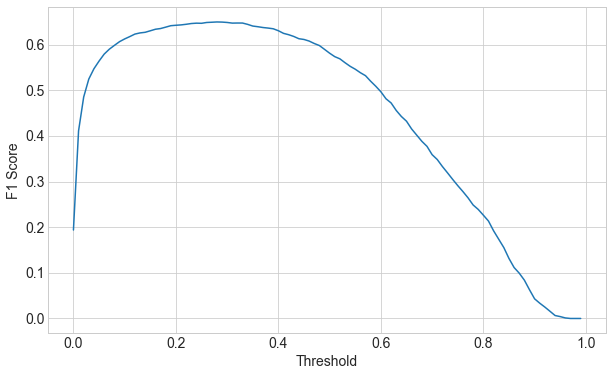

In [27]:
optimal_thresh = get_optimal_f1_thresh(target, lgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
f1_score(target, (lgb_oofs > optimal_thresh) * 1)

**Simple Function to Run Gradient Boosting**

Let's make a simple function to call gradient boosting and get our oofs and predictions. Rather than copying and pasting the same code again and again/

In [28]:
def run_gradient_boosting(clf, fit_params, train,features):
    N_SPLITS = 5
    oofs = np.zeros(len(df))

    folds = StratifiedKFold(n_splits = N_SPLITS)
    for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, train[TARGET_COL])):
        print(f'\n------------- Fold {fold_ + 1} -------------')

        ### Training Set
        X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

        ### Validation Set
        X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

        scaler = StandardScaler()
        _ = scaler.fit(X_trn)

        X_trn = scaler.transform(X_trn)
        X_val = scaler.transform(X_val)

        _ = clf.fit(X_trn, y_trn, eval_set = [(X_val, y_val)], **fit_params)

        ### Instead of directly predicting the classes we will obtain the probability of positive class.
        preds_val = clf.predict_proba(X_val)[:, 1]

        fold_score = f1_score(y_val, preds_val.round())
        print(f'\nF1 score for validation set is {fold_score}')

        oofs[val_idx] = preds_val
    oofs_score = f1_score(target, oofs.round())

    return oofs


**Manual Tuning. Choosing Hyperparameters to Tune**


------------- Fold 1 -------------
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.168487
[200]	valid_0's binary_logloss: 0.16607
[300]	valid_0's binary_logloss: 0.165615
Early stopping, best iteration is:
[278]	valid_0's binary_logloss: 0.165457

F1 score for validation set is 0.5954692556634305

------------- Fold 2 -------------
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.164862
[200]	valid_0's binary_logloss: 0.160031
[300]	valid_0's binary_logloss: 0.16025
Early stopping, best iteration is:
[265]	valid_0's binary_logloss: 0.1596

F1 score for validation set is 0.5924713584288052

------------- Fold 3 -------------
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.167799
[200]	valid_0's binary_logloss: 0.162994
[300]	valid_0's binary_logloss: 0.163351
Early stopping, best iteration is:
[242]	valid_0's binary_logloss: 0.162735

F1 score f

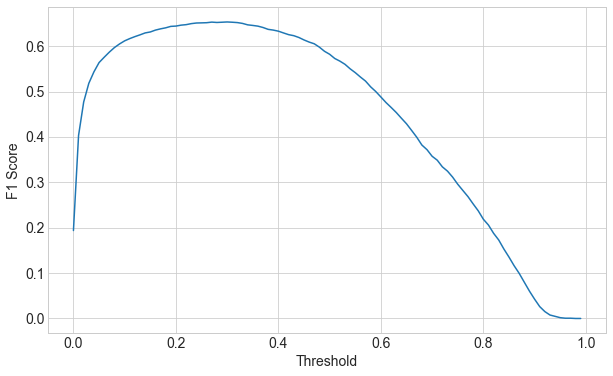

In [29]:
lgbm = LGBMClassifier(n_estimators = 1000,
                        learning_rate = 0.05,
                        colsample_bytree = 0.76,
                        )
fit_params = {'verbose': 100, 'early_stopping_rounds': 100}

lgb_oofs = run_gradient_boosting(lgbm, fit_params,df, features)

optimal_thresh = get_optimal_f1_thresh(target, lgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = f1_score(target, (lgb_oofs > optimal_thresh) * 1)
print(f'Optimized F1 is {optimized_f1}')

**Tuning Learning Rate**


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds
[200]	valid_0's binary_logloss: 0.190535
[400]	valid_0's binary_logloss: 0.172737
[600]	valid_0's binary_logloss: 0.167617
[800]	valid_0's binary_logloss: 0.165868
[1000]	valid_0's binary_logloss: 0.165195
[1200]	valid_0's binary_logloss: 0.165099
[1400]	valid_0's binary_logloss: 0.165086
Early stopping, best iteration is:
[1300]	valid_0's binary_logloss: 0.165026

F1 score for validation set is 0.5902439024390244

------------- Fold 2 -------------
Training until validation scores don't improve for 200 rounds
[200]	valid_0's binary_logloss: 0.188903
[400]	valid_0's binary_logloss: 0.169104
[600]	valid_0's binary_logloss: 0.162126
[800]	valid_0's binary_logloss: 0.159347
[1000]	valid_0's binary_logloss: 0.15822
[1200]	valid_0's binary_logloss: 0.157569
[1400]	valid_0's binary_logloss: 0.157274
[1600]	valid_0's binary_logloss: 0.157244
Early stopping, best iteration is:
[1539]	valid_0's bin

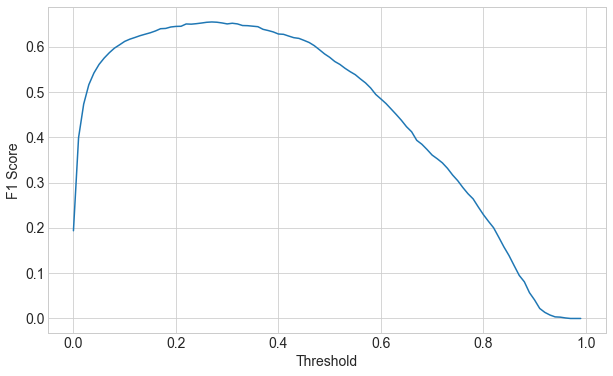

In [30]:
lgbm = LGBMClassifier(n_estimators = 2000,
                     learning_rate = 0.01,
                     colsample_bytree = 0.65,
                     random_state = 2)
fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

lgb_oofs = run_gradient_boosting(lgbm, fit_params,df, features)

optimal_thresh = get_optimal_f1_thresh(target, lgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = f1_score(target, (lgb_oofs > optimal_thresh) * 1)
score['LightGBM'] = optimized_f1
print(f'Optimized F1 is {optimized_f1}')


Enough of LightGBM, lets now look at other libraries

## **CatBoost**




------------- Fold 1 -------------
0:	learn: 0.6813125	test: 0.6812521	best: 0.6812521 (0)	total: 76.4ms	remaining: 3m 49s
200:	learn: 0.2048084	test: 0.2049896	best: 0.2049896 (200)	total: 3.49s	remaining: 48.6s
400:	learn: 0.1822030	test: 0.1851682	best: 0.1851682 (400)	total: 6.97s	remaining: 45.2s
600:	learn: 0.1715024	test: 0.1780599	best: 0.1780599 (600)	total: 10.5s	remaining: 41.8s
800:	learn: 0.1636031	test: 0.1733216	best: 0.1733216 (800)	total: 14.2s	remaining: 39.1s
1000:	learn: 0.1577824	test: 0.1704819	best: 0.1704819 (1000)	total: 17.7s	remaining: 35.3s
1200:	learn: 0.1525350	test: 0.1681392	best: 0.1681392 (1200)	total: 21.4s	remaining: 32.1s
1400:	learn: 0.1481100	test: 0.1667488	best: 0.1667488 (1400)	total: 24.9s	remaining: 28.5s
1600:	learn: 0.1441284	test: 0.1656643	best: 0.1656643 (1600)	total: 28.4s	remaining: 24.8s
1800:	learn: 0.1405313	test: 0.1649402	best: 0.1649402 (1800)	total: 31.9s	remaining: 21.2s
2000:	learn: 0.1372342	test: 0.1646690	best: 0.1646682 (

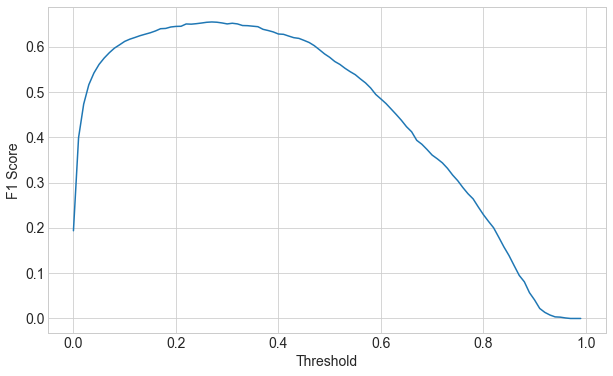

In [31]:
cat = CatBoostClassifier(n_estimators = 3000,
                       learning_rate = 0.01,
                       rsm = 0.4, ## Analogous to colsample_bytree
                       random_state=2054,
                       )

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

cb_oofs = run_gradient_boosting(cat, fit_params,df, features)

optimal_thresh = get_optimal_f1_thresh(target, cb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = f1_score(target, (cb_oofs > optimal_thresh) * 1)
score['Catboost'] = optimized_f1
print(f'Optimized F1 is {optimized_f1}')

## **XGBoost**



------------- Fold 1 -------------
[00:58:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1]	validation_0-logloss:0.62666
[2]	validation_0-logloss:0.59635
[3]	validation_0-logloss:0.57187
[4]	validation_0-logloss:0.55017
[5]	validation_0-logloss:0.52903
[6]	validation_0-logloss:0.50678
[7]	validation_0-logloss:0.48910
[8]	validation_0-logloss:0.47267
[9]	validation_0-logloss:0.45805
[10]	validation_0-logloss:0.44141
[11]	validation_0-logloss:0.42579
[12]	validation_0-logloss:0.41137
[13]	validation_0-logloss:0.40042
[14]	validation_0-logloss:0.38750
[15]	validation_0-logloss:0.37808
[16]	validation_0-logloss:0.36910
[17]	validation_0-logloss:0.36097
[18]	validation_0-logloss:0.35309
[19]	validation_0-logloss:0.34333
[20]	validation_0

[230]	validation_0-logloss:0.16712
[231]	validation_0-logloss:0.16713
[232]	validation_0-logloss:0.16715
[233]	validation_0-logloss:0.16717
[234]	validation_0-logloss:0.16716
[235]	validation_0-logloss:0.16716
[236]	validation_0-logloss:0.16714
[237]	validation_0-logloss:0.16715
[238]	validation_0-logloss:0.16717
[239]	validation_0-logloss:0.16706
[240]	validation_0-logloss:0.16699
[241]	validation_0-logloss:0.16695
[242]	validation_0-logloss:0.16699
[243]	validation_0-logloss:0.16695
[244]	validation_0-logloss:0.16693
[245]	validation_0-logloss:0.16688
[246]	validation_0-logloss:0.16675
[247]	validation_0-logloss:0.16663
[248]	validation_0-logloss:0.16655
[249]	validation_0-logloss:0.16650
[250]	validation_0-logloss:0.16651
[251]	validation_0-logloss:0.16642
[252]	validation_0-logloss:0.16635
[253]	validation_0-logloss:0.16634
[254]	validation_0-logloss:0.16634
[255]	validation_0-logloss:0.16637
[256]	validation_0-logloss:0.16633
[257]	validation_0-logloss:0.16618
[258]	validation_0-l

[466]	validation_0-logloss:0.16534
[467]	validation_0-logloss:0.16532
[468]	validation_0-logloss:0.16531
[469]	validation_0-logloss:0.16532
[470]	validation_0-logloss:0.16532
[471]	validation_0-logloss:0.16533
[472]	validation_0-logloss:0.16534
[473]	validation_0-logloss:0.16535
[474]	validation_0-logloss:0.16535
[475]	validation_0-logloss:0.16534
[476]	validation_0-logloss:0.16535
[477]	validation_0-logloss:0.16527
[478]	validation_0-logloss:0.16531
[479]	validation_0-logloss:0.16532
[480]	validation_0-logloss:0.16532
[481]	validation_0-logloss:0.16534
[482]	validation_0-logloss:0.16536
[483]	validation_0-logloss:0.16536
[484]	validation_0-logloss:0.16538
[485]	validation_0-logloss:0.16535
[486]	validation_0-logloss:0.16534
[487]	validation_0-logloss:0.16536
[488]	validation_0-logloss:0.16538
[489]	validation_0-logloss:0.16536
[490]	validation_0-logloss:0.16535
[491]	validation_0-logloss:0.16533
[492]	validation_0-logloss:0.16532
[493]	validation_0-logloss:0.16529
[494]	validation_0-l

[702]	validation_0-logloss:0.16592
[703]	validation_0-logloss:0.16594
[704]	validation_0-logloss:0.16596
[705]	validation_0-logloss:0.16595
[706]	validation_0-logloss:0.16598
[707]	validation_0-logloss:0.16595
[708]	validation_0-logloss:0.16592
[709]	validation_0-logloss:0.16590
[710]	validation_0-logloss:0.16591
[711]	validation_0-logloss:0.16587
[712]	validation_0-logloss:0.16585
[713]	validation_0-logloss:0.16593
[714]	validation_0-logloss:0.16596
[715]	validation_0-logloss:0.16598
[716]	validation_0-logloss:0.16597
[717]	validation_0-logloss:0.16596
[718]	validation_0-logloss:0.16596
[719]	validation_0-logloss:0.16598
[720]	validation_0-logloss:0.16599
[721]	validation_0-logloss:0.16597
[722]	validation_0-logloss:0.16599
[723]	validation_0-logloss:0.16597
[724]	validation_0-logloss:0.16594
[725]	validation_0-logloss:0.16596
[726]	validation_0-logloss:0.16601
[727]	validation_0-logloss:0.16600
[728]	validation_0-logloss:0.16601
[729]	validation_0-logloss:0.16603
[730]	validation_0-l

[158]	validation_0-logloss:0.17034
[159]	validation_0-logloss:0.17013
[160]	validation_0-logloss:0.16995
[161]	validation_0-logloss:0.16972
[162]	validation_0-logloss:0.16963
[163]	validation_0-logloss:0.16930
[164]	validation_0-logloss:0.16921
[165]	validation_0-logloss:0.16908
[166]	validation_0-logloss:0.16906
[167]	validation_0-logloss:0.16894
[168]	validation_0-logloss:0.16875
[169]	validation_0-logloss:0.16870
[170]	validation_0-logloss:0.16846
[171]	validation_0-logloss:0.16815
[172]	validation_0-logloss:0.16792
[173]	validation_0-logloss:0.16784
[174]	validation_0-logloss:0.16776
[175]	validation_0-logloss:0.16773
[176]	validation_0-logloss:0.16756
[177]	validation_0-logloss:0.16734
[178]	validation_0-logloss:0.16721
[179]	validation_0-logloss:0.16723
[180]	validation_0-logloss:0.16721
[181]	validation_0-logloss:0.16710
[182]	validation_0-logloss:0.16709
[183]	validation_0-logloss:0.16695
[184]	validation_0-logloss:0.16689
[185]	validation_0-logloss:0.16675
[186]	validation_0-l

[394]	validation_0-logloss:0.16166
[395]	validation_0-logloss:0.16168
[396]	validation_0-logloss:0.16172
[397]	validation_0-logloss:0.16175
[398]	validation_0-logloss:0.16173
[399]	validation_0-logloss:0.16173
[401]	validation_0-logloss:0.16167
[402]	validation_0-logloss:0.16174
[403]	validation_0-logloss:0.16174
[404]	validation_0-logloss:0.16179
[405]	validation_0-logloss:0.16182
[406]	validation_0-logloss:0.16184
[407]	validation_0-logloss:0.16188
[408]	validation_0-logloss:0.16179
[409]	validation_0-logloss:0.16180
[410]	validation_0-logloss:0.16181
[411]	validation_0-logloss:0.16179
[412]	validation_0-logloss:0.16178
[413]	validation_0-logloss:0.16178
[414]	validation_0-logloss:0.16179
[415]	validation_0-logloss:0.16174
[416]	validation_0-logloss:0.16170
[417]	validation_0-logloss:0.16166
[418]	validation_0-logloss:0.16164
[419]	validation_0-logloss:0.16159
[420]	validation_0-logloss:0.16160
[421]	validation_0-logloss:0.16159
[422]	validation_0-logloss:0.16158
[423]	validation_0-l

[2]	validation_0-logloss:0.59665
[3]	validation_0-logloss:0.57223
[4]	validation_0-logloss:0.55063
[5]	validation_0-logloss:0.52967
[6]	validation_0-logloss:0.50757
[7]	validation_0-logloss:0.49000
[8]	validation_0-logloss:0.47379
[9]	validation_0-logloss:0.45917
[10]	validation_0-logloss:0.44255
[11]	validation_0-logloss:0.42690
[12]	validation_0-logloss:0.41241
[13]	validation_0-logloss:0.40139
[14]	validation_0-logloss:0.38872
[15]	validation_0-logloss:0.37932
[16]	validation_0-logloss:0.37049
[17]	validation_0-logloss:0.36240
[18]	validation_0-logloss:0.35474
[19]	validation_0-logloss:0.34494
[20]	validation_0-logloss:0.33836
[21]	validation_0-logloss:0.33227
[22]	validation_0-logloss:0.32392
[23]	validation_0-logloss:0.31863
[24]	validation_0-logloss:0.31357
[25]	validation_0-logloss:0.30618
[26]	validation_0-logloss:0.30188
[27]	validation_0-logloss:0.29530
[28]	validation_0-logloss:0.29143
[29]	validation_0-logloss:0.28538
[30]	validation_0-logloss:0.28197
[31]	validation_0-logl

[241]	validation_0-logloss:0.16853
[242]	validation_0-logloss:0.16854
[243]	validation_0-logloss:0.16853
[244]	validation_0-logloss:0.16852
[245]	validation_0-logloss:0.16850
[246]	validation_0-logloss:0.16838
[247]	validation_0-logloss:0.16838
[248]	validation_0-logloss:0.16821
[249]	validation_0-logloss:0.16812
[250]	validation_0-logloss:0.16809
[251]	validation_0-logloss:0.16791
[252]	validation_0-logloss:0.16784
[253]	validation_0-logloss:0.16777
[254]	validation_0-logloss:0.16775
[255]	validation_0-logloss:0.16774
[256]	validation_0-logloss:0.16771
[257]	validation_0-logloss:0.16768
[258]	validation_0-logloss:0.16767
[259]	validation_0-logloss:0.16766
[260]	validation_0-logloss:0.16763
[261]	validation_0-logloss:0.16763
[262]	validation_0-logloss:0.16763
[263]	validation_0-logloss:0.16741
[264]	validation_0-logloss:0.16734
[265]	validation_0-logloss:0.16731
[266]	validation_0-logloss:0.16728
[267]	validation_0-logloss:0.16728
[268]	validation_0-logloss:0.16718
[269]	validation_0-l

[477]	validation_0-logloss:0.16674
[478]	validation_0-logloss:0.16675
[479]	validation_0-logloss:0.16677
[480]	validation_0-logloss:0.16678
[481]	validation_0-logloss:0.16676
[482]	validation_0-logloss:0.16673
[483]	validation_0-logloss:0.16675
[484]	validation_0-logloss:0.16675
[485]	validation_0-logloss:0.16676
[486]	validation_0-logloss:0.16678
[487]	validation_0-logloss:0.16679
[488]	validation_0-logloss:0.16679
[489]	validation_0-logloss:0.16678
[490]	validation_0-logloss:0.16679
[491]	validation_0-logloss:0.16679
[492]	validation_0-logloss:0.16681
[493]	validation_0-logloss:0.16681
[494]	validation_0-logloss:0.16682
[495]	validation_0-logloss:0.16683
[496]	validation_0-logloss:0.16679
[497]	validation_0-logloss:0.16680
[498]	validation_0-logloss:0.16679
[499]	validation_0-logloss:0.16681
[500]	validation_0-logloss:0.16682
[501]	validation_0-logloss:0.16683
[502]	validation_0-logloss:0.16683
[503]	validation_0-logloss:0.16684
[504]	validation_0-logloss:0.16686
[505]	validation_0-l

[150]	validation_0-logloss:0.17285
[151]	validation_0-logloss:0.17282
[152]	validation_0-logloss:0.17259
[153]	validation_0-logloss:0.17252
[154]	validation_0-logloss:0.17245
[155]	validation_0-logloss:0.17240
[156]	validation_0-logloss:0.17225
[157]	validation_0-logloss:0.17209
[158]	validation_0-logloss:0.17186
[159]	validation_0-logloss:0.17177
[160]	validation_0-logloss:0.17149
[161]	validation_0-logloss:0.17123
[162]	validation_0-logloss:0.17111
[163]	validation_0-logloss:0.17079
[164]	validation_0-logloss:0.17070
[165]	validation_0-logloss:0.17046
[166]	validation_0-logloss:0.17043
[167]	validation_0-logloss:0.17040
[168]	validation_0-logloss:0.17030
[169]	validation_0-logloss:0.17029
[170]	validation_0-logloss:0.17004
[171]	validation_0-logloss:0.16969
[172]	validation_0-logloss:0.16958
[173]	validation_0-logloss:0.16945
[174]	validation_0-logloss:0.16938
[175]	validation_0-logloss:0.16935
[176]	validation_0-logloss:0.16931
[177]	validation_0-logloss:0.16923
[178]	validation_0-l

[386]	validation_0-logloss:0.16409
[387]	validation_0-logloss:0.16400
[388]	validation_0-logloss:0.16401
[389]	validation_0-logloss:0.16394
[390]	validation_0-logloss:0.16393
[391]	validation_0-logloss:0.16393
[392]	validation_0-logloss:0.16394
[393]	validation_0-logloss:0.16392
[394]	validation_0-logloss:0.16395
[395]	validation_0-logloss:0.16395
[396]	validation_0-logloss:0.16394
[397]	validation_0-logloss:0.16394
[398]	validation_0-logloss:0.16397
[399]	validation_0-logloss:0.16400
[401]	validation_0-logloss:0.16390
[402]	validation_0-logloss:0.16391
[403]	validation_0-logloss:0.16390
[404]	validation_0-logloss:0.16400
[405]	validation_0-logloss:0.16405
[406]	validation_0-logloss:0.16407
[407]	validation_0-logloss:0.16412
[408]	validation_0-logloss:0.16414
[409]	validation_0-logloss:0.16411
[410]	validation_0-logloss:0.16416
[411]	validation_0-logloss:0.16420
[412]	validation_0-logloss:0.16418
[413]	validation_0-logloss:0.16415
[414]	validation_0-logloss:0.16416
[415]	validation_0-l

[623]	validation_0-logloss:0.16483
[624]	validation_0-logloss:0.16484
[625]	validation_0-logloss:0.16487
[626]	validation_0-logloss:0.16487
[627]	validation_0-logloss:0.16488
[628]	validation_0-logloss:0.16490
[629]	validation_0-logloss:0.16494
[630]	validation_0-logloss:0.16495
[631]	validation_0-logloss:0.16487
[632]	validation_0-logloss:0.16488
[633]	validation_0-logloss:0.16487
[634]	validation_0-logloss:0.16488
[635]	validation_0-logloss:0.16494
[636]	validation_0-logloss:0.16495
[637]	validation_0-logloss:0.16496
[638]	validation_0-logloss:0.16497
[639]	validation_0-logloss:0.16495
[640]	validation_0-logloss:0.16498
[641]	validation_0-logloss:0.16500
[642]	validation_0-logloss:0.16504
[643]	validation_0-logloss:0.16505
[644]	validation_0-logloss:0.16508
[645]	validation_0-logloss:0.16508
[646]	validation_0-logloss:0.16506
[647]	validation_0-logloss:0.16509
[648]	validation_0-logloss:0.16511
[649]	validation_0-logloss:0.16510
[650]	validation_0-logloss:0.16513
[651]	validation_0-l

[193]	validation_0-logloss:0.17617
[194]	validation_0-logloss:0.17616
[195]	validation_0-logloss:0.17603
[196]	validation_0-logloss:0.17602
[197]	validation_0-logloss:0.17597
[198]	validation_0-logloss:0.17594
[199]	validation_0-logloss:0.17581
[201]	validation_0-logloss:0.17565
[202]	validation_0-logloss:0.17570
[203]	validation_0-logloss:0.17549
[204]	validation_0-logloss:0.17553
[205]	validation_0-logloss:0.17532
[206]	validation_0-logloss:0.17521
[207]	validation_0-logloss:0.17526
[208]	validation_0-logloss:0.17522
[209]	validation_0-logloss:0.17514
[210]	validation_0-logloss:0.17513
[211]	validation_0-logloss:0.17511
[212]	validation_0-logloss:0.17510
[213]	validation_0-logloss:0.17507
[214]	validation_0-logloss:0.17506
[215]	validation_0-logloss:0.17501
[216]	validation_0-logloss:0.17495
[217]	validation_0-logloss:0.17495
[218]	validation_0-logloss:0.17479
[219]	validation_0-logloss:0.17483
[220]	validation_0-logloss:0.17480
[221]	validation_0-logloss:0.17464
[222]	validation_0-l

[430]	validation_0-logloss:0.17184
[431]	validation_0-logloss:0.17182
[432]	validation_0-logloss:0.17181
[433]	validation_0-logloss:0.17181
[434]	validation_0-logloss:0.17183
[435]	validation_0-logloss:0.17185
[436]	validation_0-logloss:0.17183
[437]	validation_0-logloss:0.17184
[438]	validation_0-logloss:0.17183
[439]	validation_0-logloss:0.17185
[440]	validation_0-logloss:0.17189
[441]	validation_0-logloss:0.17189
[442]	validation_0-logloss:0.17187
[443]	validation_0-logloss:0.17186
[444]	validation_0-logloss:0.17187
[445]	validation_0-logloss:0.17185
[446]	validation_0-logloss:0.17186
[447]	validation_0-logloss:0.17186
[448]	validation_0-logloss:0.17189
[449]	validation_0-logloss:0.17192
[450]	validation_0-logloss:0.17191
[451]	validation_0-logloss:0.17190
[452]	validation_0-logloss:0.17189
[453]	validation_0-logloss:0.17186
[454]	validation_0-logloss:0.17186
[455]	validation_0-logloss:0.17188
[456]	validation_0-logloss:0.17181
[457]	validation_0-logloss:0.17183
[458]	validation_0-l

[666]	validation_0-logloss:0.17269
[667]	validation_0-logloss:0.17268
[668]	validation_0-logloss:0.17267
[669]	validation_0-logloss:0.17266
[670]	validation_0-logloss:0.17266
[671]	validation_0-logloss:0.17266
[672]	validation_0-logloss:0.17267
[673]	validation_0-logloss:0.17267
[674]	validation_0-logloss:0.17271
[675]	validation_0-logloss:0.17272
[676]	validation_0-logloss:0.17273

F1 score for validation set is 0.5492487479131887
Optimal threhold is 0.27
Optimized F1 is 0.6490132400699475


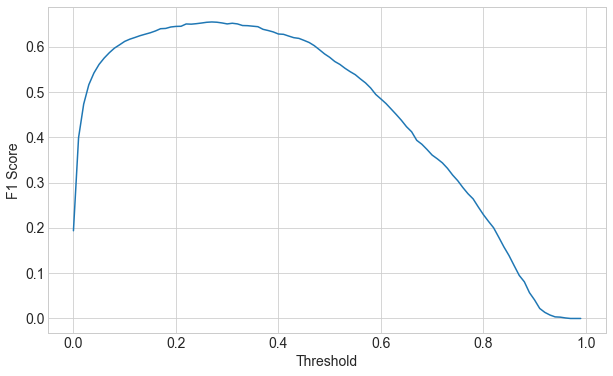

In [32]:
xgb = XGBClassifier(n_estimators = 1000,
                    max_depth = 6,
                    learning_rate = 0.05,
                    colsample_bytree = 0.5,
                    random_state=1452,
                    )

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

xgb_oofs = run_gradient_boosting(xgb, fit_params, df, features)

optimal_thresh = get_optimal_f1_thresh(target, xgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = f1_score(target, (xgb_oofs > optimal_thresh) * 1)
score['XGBoost'] = optimized_f1
print(f'Optimized F1 is {optimized_f1}')

# **Ensembling**



In [33]:
train_new = train[[ID_COL, TARGET_COL]]

train_new['lgb'] = lgb_oofs

train_new['cb'] = cb_oofs

train_new['xgb'] = xgb_oofs

features = [c for c in train_new.columns if c not in [ID_COL, TARGET_COL]]

In [34]:
features

['lgb', 'cb', 'xgb']


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds
[200]	valid_0's binary_logloss: 0.172329
[400]	valid_0's binary_logloss: 0.163376
[600]	valid_0's binary_logloss: 0.162835
Early stopping, best iteration is:
[555]	valid_0's binary_logloss: 0.162786

F1 score for validation set is 0.6171516079632465

------------- Fold 2 -------------
Training until validation scores don't improve for 200 rounds
[200]	valid_0's binary_logloss: 0.166787
[400]	valid_0's binary_logloss: 0.157626
[600]	valid_0's binary_logloss: 0.157594
Early stopping, best iteration is:
[519]	valid_0's binary_logloss: 0.157317

F1 score for validation set is 0.6198920585967618

------------- Fold 3 -------------
Training until validation scores don't improve for 200 rounds
[200]	valid_0's binary_logloss: 0.170503
[400]	valid_0's binary_logloss: 0.162349
[600]	valid_0's binary_logloss: 0.161923
Early stopping, best iteration is:
[584]	valid_0's binary_logloss: 0.161896

F1 sco

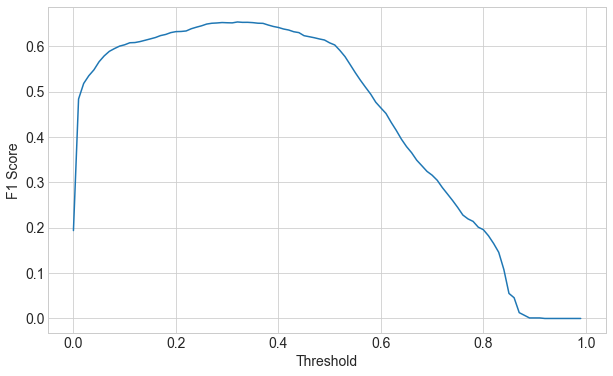

In [35]:
clf = LGBMClassifier(n_estimators = 2000,
                        learning_rate = 0.01,
                        colsample_bytree = 0.75,
                        reg_alpha=1,
                        reg_lambda=1,
                        )
fit_params = {'verbose': 200, 'early_stopping_rounds': 200}
lgb_oofs = run_gradient_boosting(clf, fit_params, train_new, features)

optimal_thresh = get_optimal_f1_thresh(target, lgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = f1_score(target, (lgb_oofs > optimal_thresh) * 1)
score['Ensembling'] = optimized_f1
print(f'Optimized F1 is {optimized_f1}')

In [41]:
import pickle
name = ['Logistic_refression','Decision_Tree','Light_gbm','CatBoost','XGBoost','Ensemble']
model = [LR,tree,lgbm,cat,xgb,clf]
for i,j in zip(model,name):
    pickle.dump(i, open(f'Models/{j}.pkl', 'wb'))

## **Comparison of Models**

In [42]:
result = pd.DataFrame({'Model':score.keys(),'Score':score.values()})

In [43]:
result

,Model,Score
0,Logistic-Regression,0.472038
1,Decision Tree,0.588105
2,LightGBM,0.654809
3,Catboost,0.657595
4,XGBoost,0.649013
5,Ensembling,0.653422


from the above table conclude that Gradient Boosting algorithm give the best result.
I chose the LightGBM model as my best model because it give best result also 
1. Faster training speed campare to other Gradient Boosting algorithm
2. higher efficiency.
3.  Lower memory usage.